# 1) Interpolation

In [38]:
import numpy as np
import matplotlib.pyplot as plt

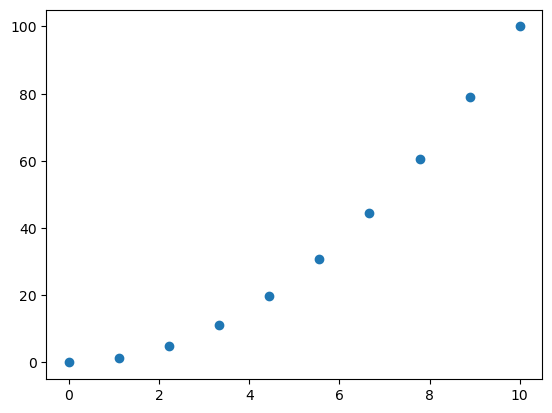

In [39]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

In [40]:
from scipy.interpolate import interp1d

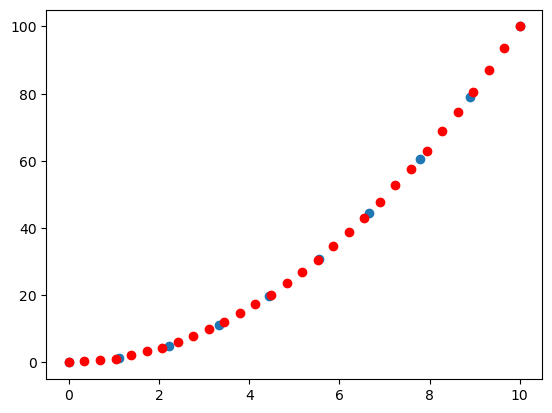

In [41]:
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

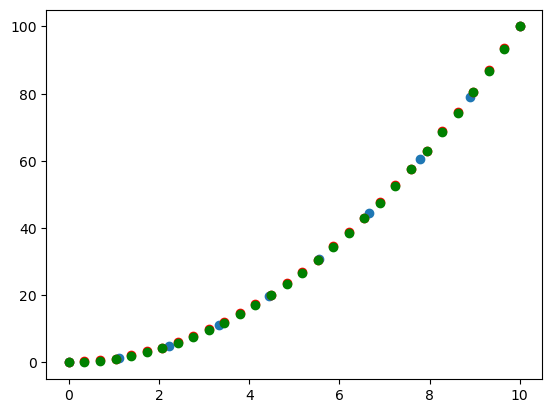

In [42]:
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')
z = new_x**2
plt.scatter(new_x, z, c='g')

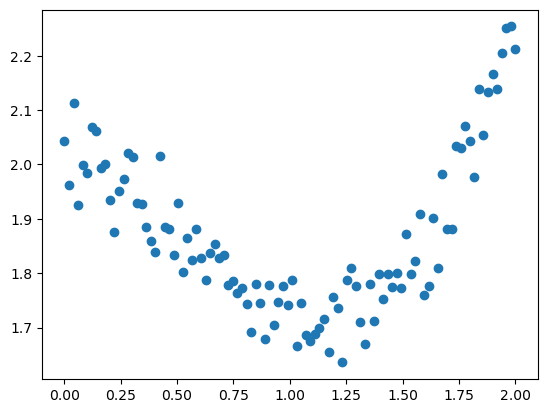

In [43]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 -3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [44]:
from scipy import optimize

In [45]:
def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [46]:
params, params_corr = optimize.curve_fit(f, x, y)

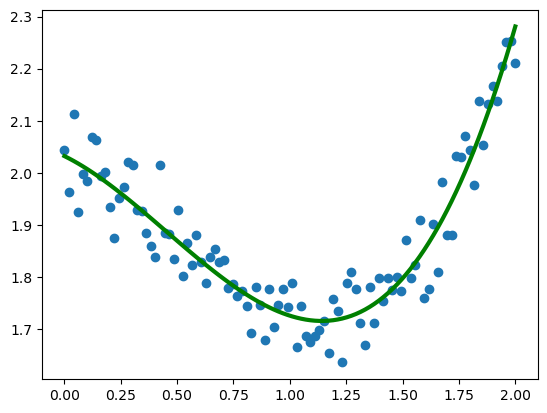

In [47]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

In [48]:
def f(x):
    return x**2 + 15*np.sin(x)

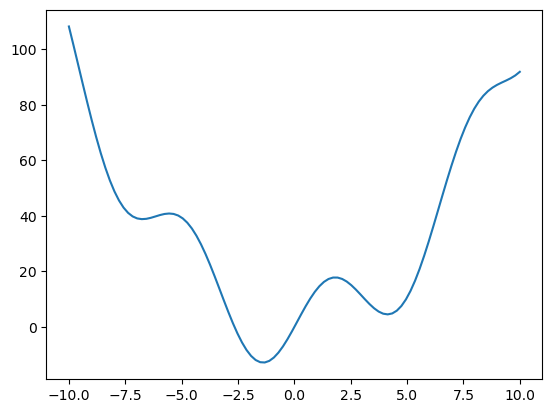

In [49]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [50]:
m = optimize.minimize(f, x0=-5).x

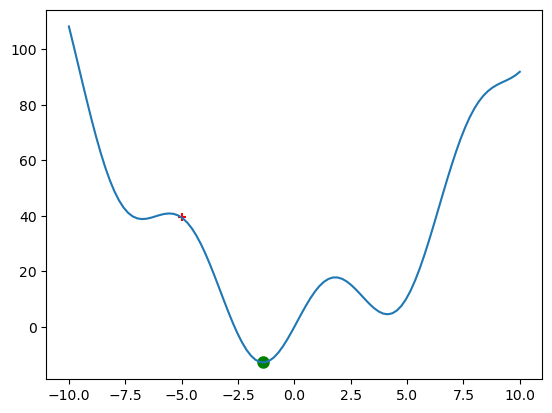

In [22]:
plt.plot(x, f(x))
plt.scatter(-5, f(-5), marker='+', c='r')
plt.scatter(m, f(m), lw=3, c='g')
plt.show()

In [51]:
from scipy import ndimage

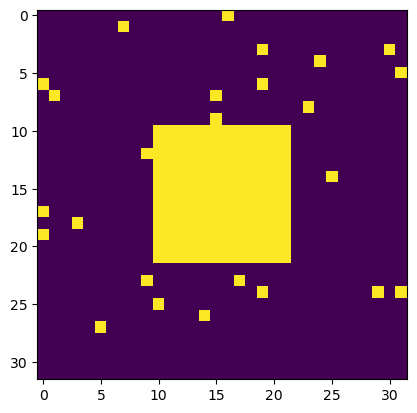

In [52]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

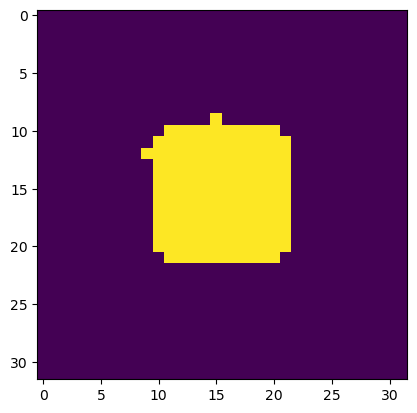

In [53]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

# Bacterie count

(507, 537)

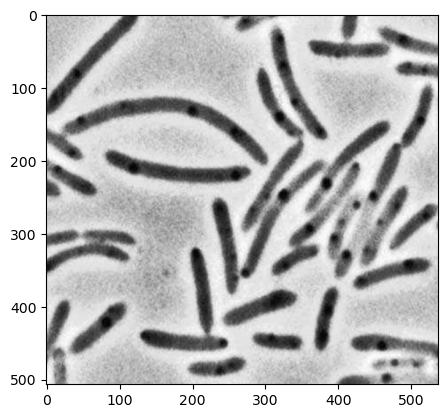

In [54]:
image = plt.imread('imgs/bacteria.png')
image = image[:,:,0]
plt.imshow(image, cmap='gray')
image.shape

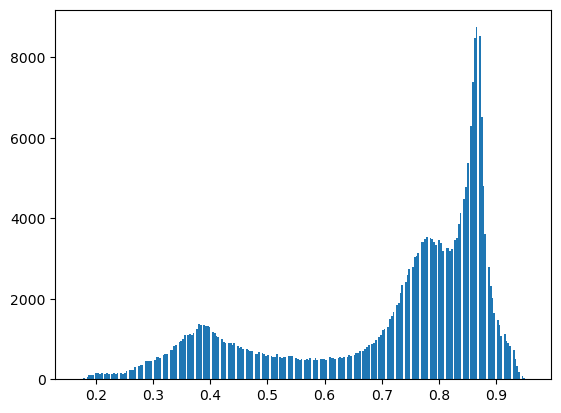

In [55]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

In [56]:
image

array([[0.7490196 , 0.75686276, 0.7647059 , ..., 0.78039217, 0.78039217,
        0.7647059 ],
       [0.7529412 , 0.7607843 , 0.7764706 , ..., 0.7921569 , 0.7921569 ,
        0.76862746],
       [0.7647059 , 0.7647059 , 0.78039217, ..., 0.8156863 , 0.8117647 ,
        0.78039217],
       ...,
       [0.9254902 , 0.92941177, 0.93333334, ..., 0.7058824 , 0.67058825,
        0.65882355],
       [0.9254902 , 0.92941177, 0.92941177, ..., 0.7019608 , 0.6745098 ,
        0.65882355],
       [0.92156863, 0.9254902 , 0.9254902 , ..., 0.69803923, 0.6745098 ,
        0.6627451 ]], dtype=float32)

In [57]:
image < 0.6

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [58]:
image = image < 0.6

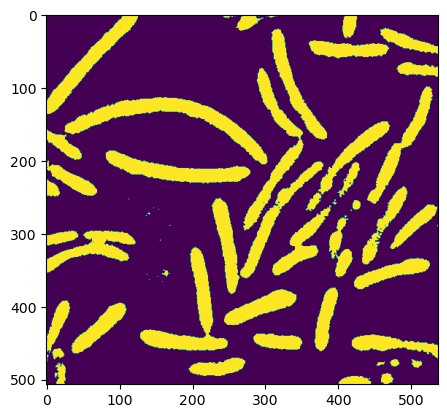

In [59]:
plt.imshow(image)

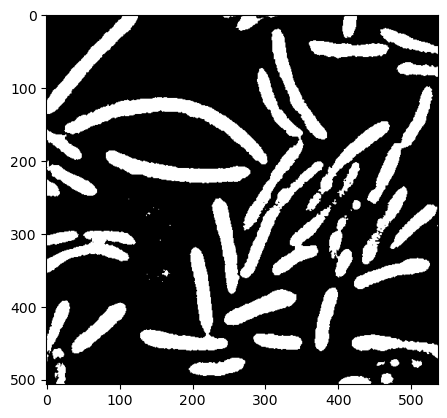

In [60]:
plt.imshow(image, cmap='gray')

In [61]:
image_3 = ndimage.binary_opening(image)

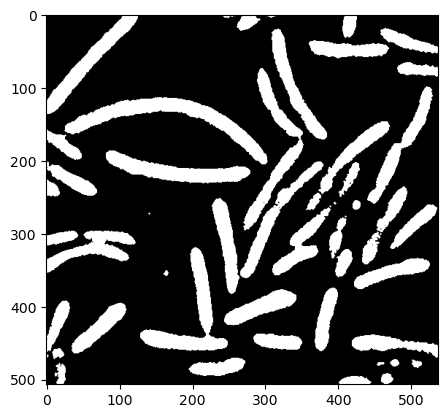

In [62]:
plt.imshow(image_3, cmap='gray')

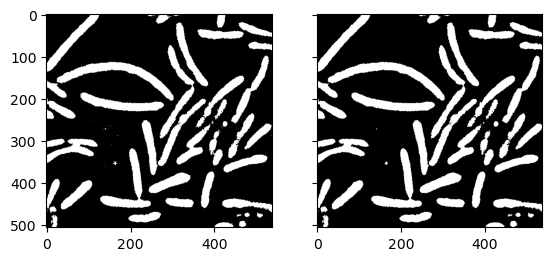

In [66]:
ax, fig = plt.subplots(1, 2, sharey=True)
fig[0].imshow(image, cmap='gray')
fig[1].imshow(image_3, cmap='gray')

In [68]:
label_image, n_labels = ndimage.label(image_3)
print(n_labels)

53


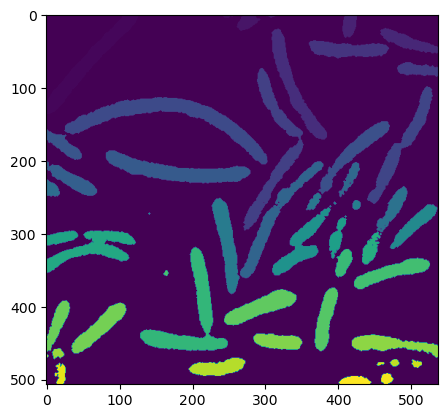

In [69]:
plt.imshow(label_image)

In [70]:
sizes = ndimage.sum(image_3, label_image, range(n_labels))

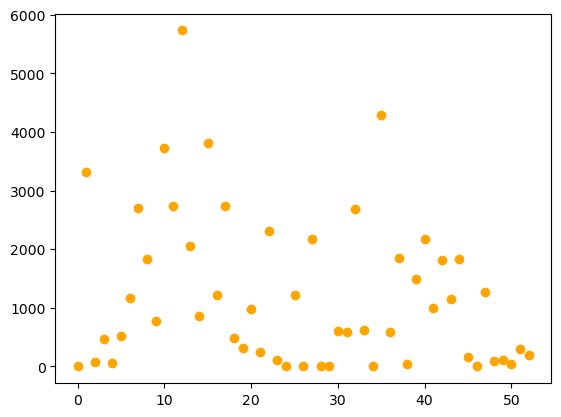

In [71]:
plt.scatter(range(n_labels), sizes, c='orange')